In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

In [2]:
# GROUP SPEED 

In [3]:
replicates = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
treatments = [
    'RB4',
    'RB3+TB1',
    'RB2+TB2',
    'RB1+TB3',
    'TB4'
]

vel = np.empty((10, 5), dtype=object)
pos = np.empty((10, 5), dtype=object)

for t, treatment in enumerate(treatments):
    for r, replicate in enumerate(replicates):
        filename = f'/Users/jahanvitiwari/Desktop/Arshad modified codes/cleaned data GS4/GS4_{treatment}_{replicate}_traj.npz'
        try:
            data = np.load(filename)
            vel[r][t] = data['velocities']
            pos[r][t] = data['positions']
        except:
            print(f'File: {filename} not found.')

In [4]:
#bodylength values where rows=replicates and col=treatment

bl = np.array([
    [4.0525,	3.54,	3.63,	3.3675,	2.9125],
[3.6625,	3.575,	3.2925,	3.17,	2.865],
[3.7775,	3.5075,	3.465,	3.1925,	3.2625],
[3.995,	3.475,	3.5675,	3.2825,	3.1175],
[3.7975,	3.7475,	3.475,	3.35,	3.11],
[3.7375,	3.6975,	3.385,	3.605,	3.095],
[3.81, 3.4525,	3.5025,	3.51,	2.8325],
[3.7425,	3.63,	3.3675,	3.255,	3.1],
[3.9025,	3.5475,	3.465,	3.2375,	2.885],
[3.58,	3.5425,	3.3175,	3.3925,	2.8525]
])

bl.shape

(10, 5)

In [5]:
for t in range(5):
    for r in range(10):
        vel[r][t] /= bl[r][t] 
        pos[r][t] /= bl[r][t]

In [6]:
# GROUP SPEED ANALYSIS

In [7]:
speed = np.empty_like(vel)
for t in range(5):
    for r in range(10):
        speed[r][t] = np.linalg.norm(vel[r][t], axis=2)

In [8]:
for t in range(5):
    for r in range(10):
        speed[r][t][speed[r][t] < 0.01] = np.nan

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

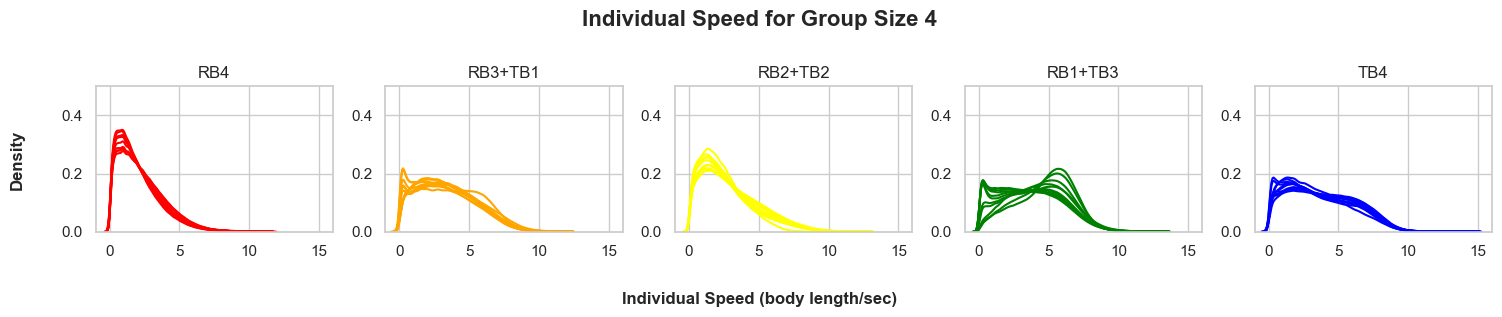

In [13]:
#INDIVIDUAL SPEED PLOT (CONCATENATE)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

colors = ['red', 'orange', 'yellow', 'green', 'blue']

for i in range(5): # treatment
    s = np.empty((0, 4))
    for j in range(10): #replicate
        s = np.concatenate((s, speed[j][i]))
        
        sns.kdeplot(s.ravel(), ax=axes[i], fill=False, color=colors[i])
        
        
        axes[i].set_ylim(0, 0.5)
        axes[i].set_xlim(-1, 16)
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        axes[i].set_title(f'{treatments[i]}')

fig.suptitle('Individual Speed for Group Size 4', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Individual Speed (body length/sec)', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('individual_speed_concatenate_GS4_bl.png', bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

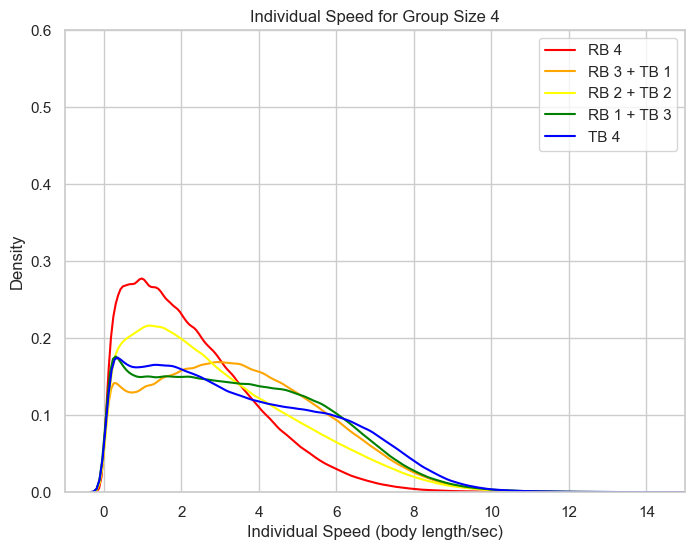

In [12]:
# INDIVIDUAL SPEED PLOT

sns.set(style='whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize=(8, 6))

colors = ['red', 'orange', 'yellow', 'green', 'blue']
labels = ['RB 4', 'RB 3 + TB 1', 'RB 2 + TB 2', 'RB 1 + TB 3', 'TB 4']
for i in range(5): # treatment
    s = np.empty((0, 4))
    for j in range(10): #replicate
        s = np.concatenate((s, speed[j][i]))

        
    sns.kdeplot(s.ravel(), fill=False, color=colors[i], label=labels[i])
    plt.xlim(-1,15)
    plt.ylim(0,0.6)

plt.title("Individual Speed for Group Size 4")
plt.xlabel("Individual Speed (body length/sec)")
plt.ylabel("Density")
plt.legend()

fig.show()
fig.savefig('individual_speed_gs4_bl.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

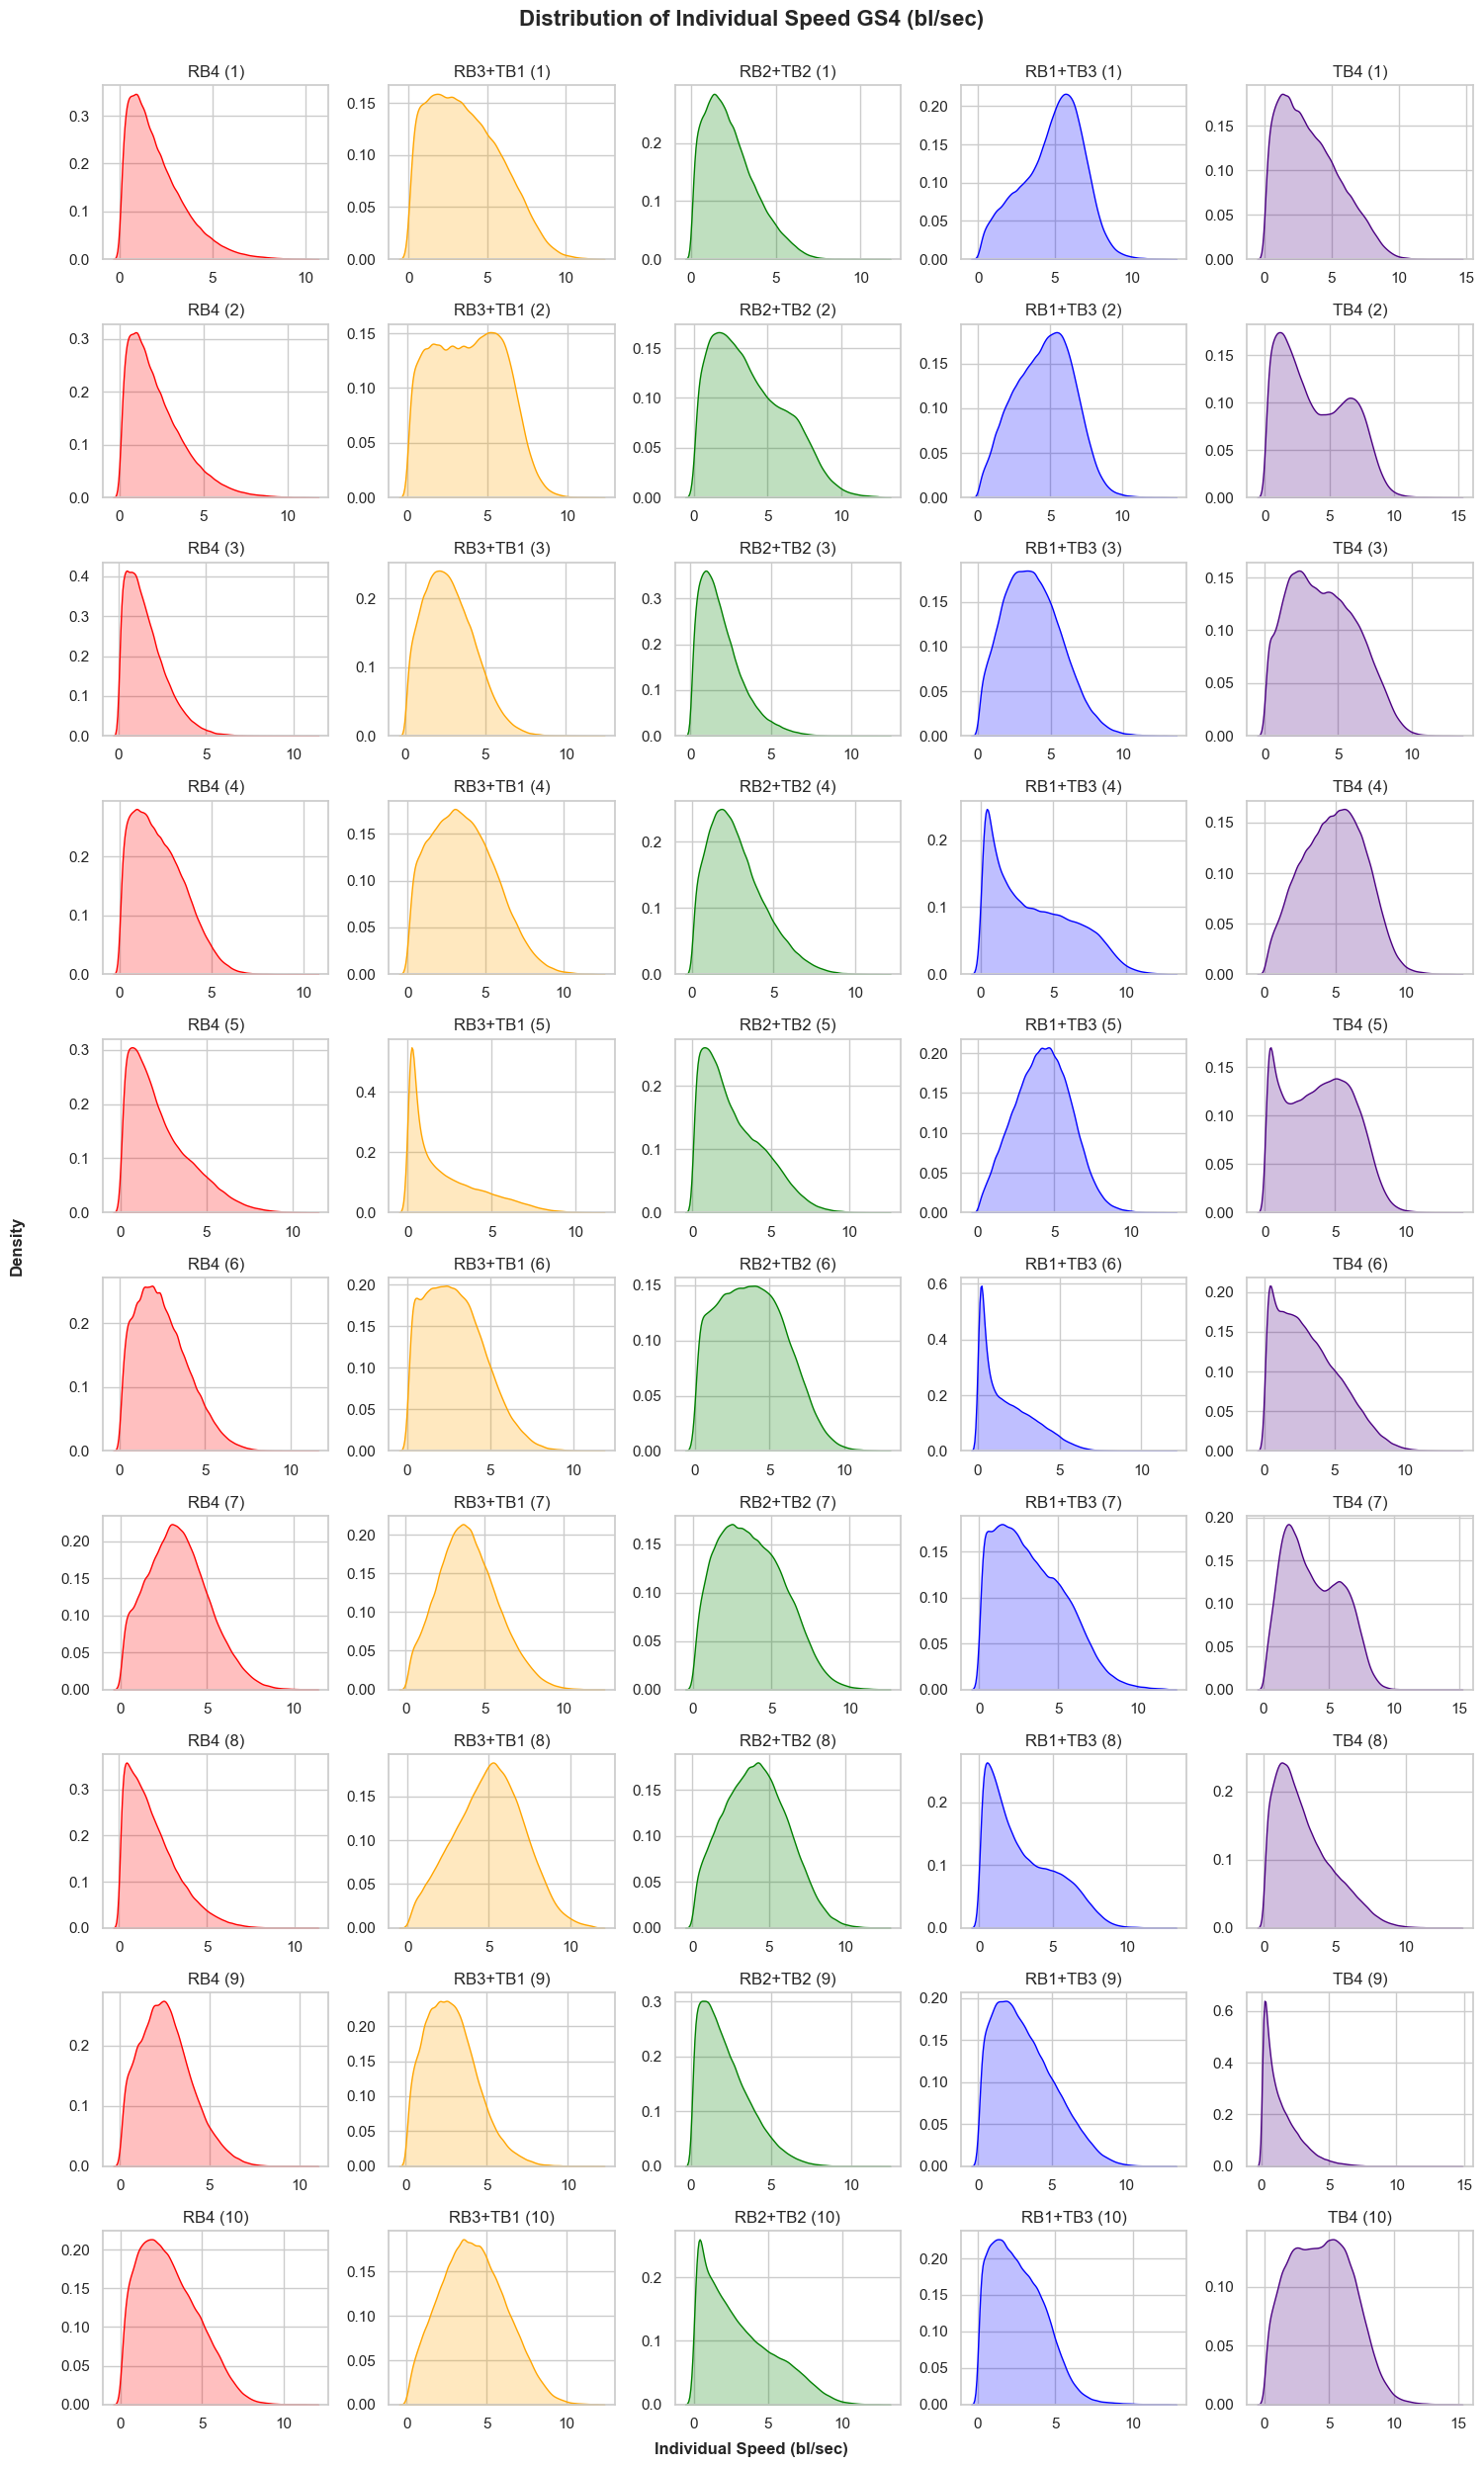

In [57]:
# INDIVIDUAL SPEED PLOT REPLICATES WISE

fig, axes = plt.subplots(10, 5, figsize=(15, 25))

colors = ['red', 'orange', 'green', 'blue', 'indigo']
for i in range(10):
    for j in range(5):
        index = i * 10 + j  # Calculate the index of ind_speed
        sns.kdeplot(speed[i][j].ravel(),
                    ax=axes[i, j], fill=True, color=colors[index % len(colors)])
        
       # axes[i, j].set_ylim(0, 0.7)
       # axes[i, j].set_xlim(0, 12)
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')
        axes[i, j].set_title(f'{treatments[j]} ({replicates[i]})')


fig.suptitle('Distribution of Individual Speed GS4 (bl/sec)', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Individual Speed (bl/sec)', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('distribution_of_individual_speeds_replicatewise_gs4_bl.png', bbox_inches='tight')


In [34]:
# calculating speed diffference

# Speed is the 10x5 matrix of replicate x treatment, where for each data point we have [t, 4] shaped array which stored the magnitude
# speed for each fish at each time point. 

pw_speed_diff = np.empty_like(speed)
for replicate in range(10):
    for treatment in range(5):
        T, N = speed[replicate, treatment].shape
        pw_speed_diff[replicate, treatment] = np.empty((T, N, N))
        for time in range(T):
            speed_diff = (np.subtract.outer(speed[replicate, treatment][time], speed[replicate, treatment][time]))
            np.fill_diagonal(speed_diff, np.nan)
            pw_speed_diff[replicate, treatment][time, :, :] = speed_diff

In [35]:
pw_speed_diff[1][2].shape

(92216, 4, 4)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

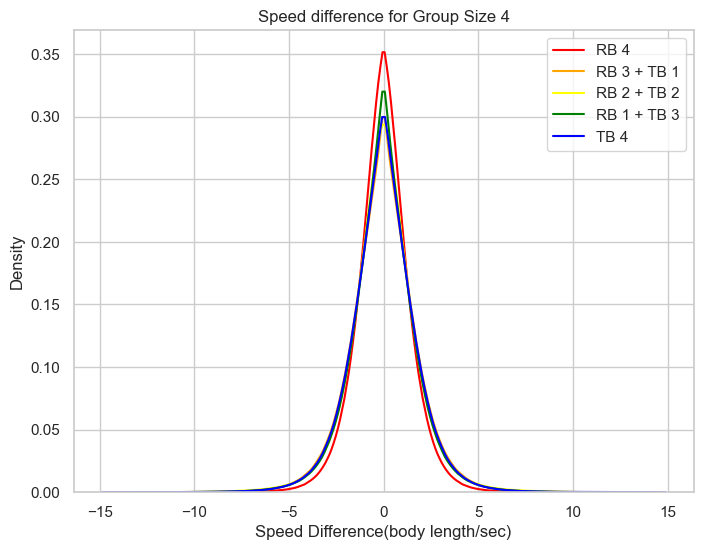

In [18]:
# SPEED DIFFERENCE PLOT

sns.set(style='whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize=(8, 6))

colors = ['red', 'orange', 'yellow', 'green', 'blue']
labels = ['RB 4', 'RB 3 + TB 1', 'RB 2 + TB 2', 'RB 1 + TB 3', 'TB 4']
for i in range(5): # treatment
    sd = np.empty((0, 4, 4))
    for j in range(10): #replicate
        sd = np.concatenate((sd, pw_speed_diff[j][i]))

    sns.kdeplot(sd.ravel(), fill=False, color=colors[i], label=labels[i])

plt.title("Speed difference for Group Size 4")
plt.xlabel("Speed Difference(body length/sec)")
plt.ylabel("Density")
plt.legend()
fig.show()
fig.savefig('individual_speed_difference_gs4.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

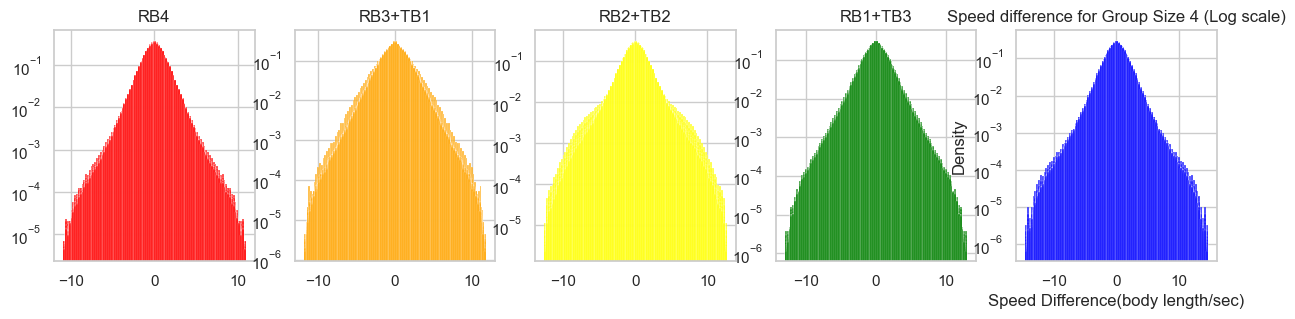

In [39]:
# SPEED DIFFERENCE PLOT (LOG SCALE)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

colors = ['red', 'orange', 'yellow', 'green', 'blue']

for i in range(5): # treatment
    sd = np.empty((0, 4, 4))
    for j in range(10): #replicate
        sd = np.concatenate((sd, pw_speed_diff[j][i]))
        
        sns.histplot(sd.ravel(), ax=axes[i], bins =100, color=colors[i], kde = False, log=True, stat = 'density')
        
        #axes[i].set_ylim(0, 20)
        #axes[i].set_xlim(0, 1)
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        axes[i].set_title(f'{treatments[i]}')

plt.title("Speed difference for Group Size 4 (Log scale)")
plt.xlabel("Speed Difference(body length/sec)")
plt.ylabel("Density")

fig.show()
fig.savefig('individual_speed_difference_gs4_logscale.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

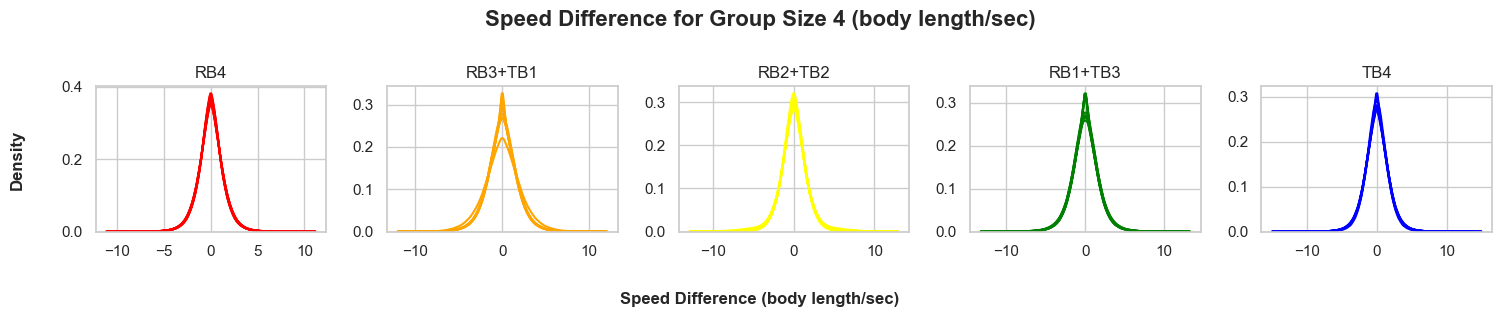

In [21]:
# SPEED DIFFERENCE REPLICATE-WISE

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

colors = ['red', 'orange', 'yellow', 'green', 'blue']

for i in range(5): # treatment
    sd = np.empty((0, 4, 4))
    for j in range(10): #replicate
        sd = np.concatenate((sd, pw_speed_diff[j][i]))
        
        sns.kdeplot(sd.ravel(), ax=axes[i], fill=False, color=colors[i])

        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        axes[i].set_title(f'{treatments[i]}')

fig.suptitle('Speed Difference for Group Size 4 (body length/sec)', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Speed Difference (body length/sec)', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('speed_difference_repicatewise_GS4_bl.png', bbox_inches='tight')

In [38]:
from scipy.stats import ttest_rel
# Initialize arrays for dummy speed differences
pw_speed_diff_dummy = np.empty_like(pw_speed_diff)
# Create a pooled speed dataset for each treatment
pooled_speed = []
for t in range(5):
    pooled_speed.append(np.concatenate([speed[r][t] for r in range(10)], axis=0))
# Create dummy pairwise speed differences by sampling from pooled speed data (within each treatment)
for t in range(5):
    T, N, _ = pw_speed_diff[t][0].shape  # T: time, N: number of fish
    for r in range(10):
        pw_speed_diff_dummy[r][t] = np.empty((T, N, N))
        for time in range(T):
            # Sample speeds from the pooled data (keeping treatment conserved)
            sampled_speeds = np.random.choice(pooled_speed[t][:, time], size=(N,), replace=True)
            speed_diff_dummy = (np.subtract.outer(sampled_speeds, sampled_speeds))
            np.fill_diagonal(speed_diff_dummy, np.nan)
            pw_speed_diff_dummy[r][t][time, :, :] = speed_diff_dummy
# Significance testing between original and dummy model
p_values = np.zeros(5)  # To store p-values for each treatment
# Plotting setup
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for t in range(5):
    # Collect original and dummy differences for current treatment
    original_diff = np.nanmean(pw_speed_diff[t], axis=(1, 2))  # Averaged across time and pairwise comparisons
    dummy_diff = np.nanmean(pw_speed_diff_dummy[t], axis=(1, 2))
    # Statistical significance test (paired t-test)
    t_stat, p_value = ttest_rel(original_diff, dummy_diff, nan_policy='omit')
    p_values[t] = p_value
    # Plot the comparison
    sns.kdeplot(original_diff, fill=True, ax=axes[t], label='Original', color='blue')
    sns.kdeplot(dummy_diff, fill=True, ax=axes[t], label='Dummy', color='red')
    axes[t].set_title(f'Treatment {treatments[t]} (p={p_value:.2e})')
    axes[t].set_xlabel('Speed Difference')
    axes[t].legend()
plt.tight_layout()
plt.show()
# Inference
for t in range(5):
    if p_values[t] < 0.05:
        print(f'Treatment {treatments[t]}: The original pairwise speed difference is significantly lower than the dummy model (p={p_values[t]:.4f}).')
    else:
        print(f'Treatment {treatments[t]}: No significant difference between the original and dummy model (p={p_values[t]:.4f}).')

IndexError: index 4 is out of bounds for axis 1 with size 4

In [ ]:
# COHESION PLOTS

In [7]:
#PAIRWISE DISTANCE

pw_dist = np.empty((10,5), dtype = object)
for replicate in range (10):
    for treatment in range (5):
        T, N = pos[replicate, treatment].shape[:2]
        pw_dist[replicate, treatment] = np.empty ((T, N, N))
        for t in range (T):
            pair_dist = squareform(pdist(pos[replicate, treatment][t, :, :]))
            pair_dist[pair_dist == 0] = np.nan
            pw_dist[replicate, treatment][t,:,:] = pair_dist 

In [9]:
# NEAR NEIGHBOUR DISTANCE

pw_dist = np.empty((10,5), dtype = object)
nnd = np.empty((10,5), dtype = object)

for replicate in range (10):
    for treatment in range (5):
        T, N = pos[replicate, treatment].shape[:2]
        pw_dist[replicate, treatment] = np.empty ((T, N, N))
        nnd [replicate, treatment] = np.empty ((T, N))
        for t in range (T):
            pair_dist = squareform(pdist(pos[replicate, treatment][t, :, :]))
            pair_dist[pair_dist == 0] = np.nan
            pw_dist[replicate, treatment][t,:,:] = pair_dist
            nnd[replicate, treatment][t, :] = np.nanmin(pair_dist)

/var/folders/yx/fr740nw51gx5ylj1n1z8jp7c0000gn/T/ipykernel_1588/1202937428.py:15: RuntimeWarning: All-NaN slice encountered
  nnd[replicate, treatment][t, :] = np.nanmin(pair_dist)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

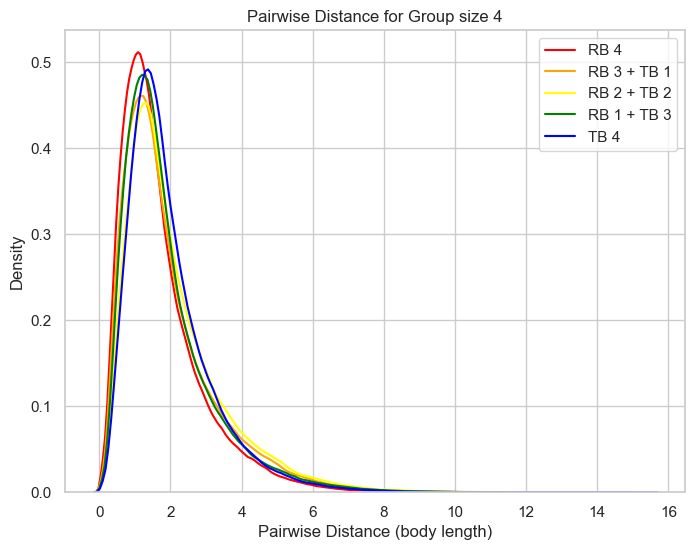

In [9]:
#Pairwise distance plot

sns.set(style='whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize=(8, 6))

colors = ['red', 'orange', 'yellow', 'green', 'blue']
labels = ['RB 4', 'RB 3 + TB 1', 'RB 2 + TB 2', 'RB 1 + TB 3', 'TB 4']
for i in range(5): # treatment
    pd = np.empty((0, 4, 4))
    for j in range(10): #replicate
        pd = np.concatenate((pd, pw_dist[j][i]))

    sns.kdeplot(pd.ravel(), fill=False, color=colors[i], label=labels[i])

plt.title("Pairwise Distance for Group size 4")
plt.xlabel("Pairwise Distance (body length)")
plt.ylabel("Density")
plt.legend()
fig.show()
fig.savefig('pairwise_distance_gs4_plot.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

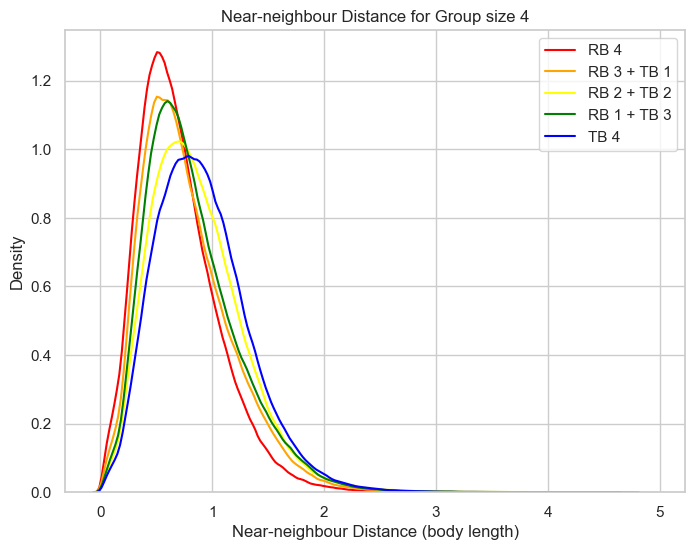

In [14]:
#NND plot

sns.set(style='whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize=(8, 6))

colors = ['red', 'orange', 'yellow', 'green', 'blue']
labels = ['RB 4', 'RB 3 + TB 1', 'RB 2 + TB 2', 'RB 1 + TB 3', 'TB 4']
for i in range(5): # treatment
    nd = np.empty((0, 4))
    for j in range(10): #replicate
        nd = np.concatenate((nd, nnd[j][i]))

    sns.kdeplot(nd.ravel(), fill=False, color=colors[i], label=labels[i])

plt.title("Near-neighbour Distance for Group size 4")
plt.xlabel("Near-neighbour Distance (body length)")
plt.ylabel("Density")
plt.legend()
fig.show()
fig.savefig('near_neighbour_distance_gs4_plot.png', dpi=300, bbox_inches='tight')

In [14]:
#POLARIZATION

In [57]:
replicates = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
treatments = [
    'RB4',
    'RB3+TB1',
    'RB2+TB2',
    'RB1+TB3',
    'TB4'
]

pol = np.empty((5, 10), dtype=object)

for t, treatment in enumerate(treatments):
    for r, replicate in enumerate(replicates):
        filename = f'/Users/jahanvitiwari/Desktop/Arshad modified codes/cleaned data GS4/GS4_{treatment}_{replicate}_pol.csv'
        try:
            data = pd.read_csv(filename)
            pol[t][r] = data[['pol_x', 'pol_y']].values
        except:
            print(f'File: {filename} not found.')
# for r in replicates:
#     for t in treatments:
#         print(f'/Users/jahanvitiwari/Desktop/Arshad modified codes/cleaned data/MS_RB+TB_{r}_{t}_traj.npz')

In [58]:
polarization = np.empty_like(pol)
for t in range(5):
    for r in range(10):
         polarization[t][r] = np.linalg.norm(pol[t][r], axis=1)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

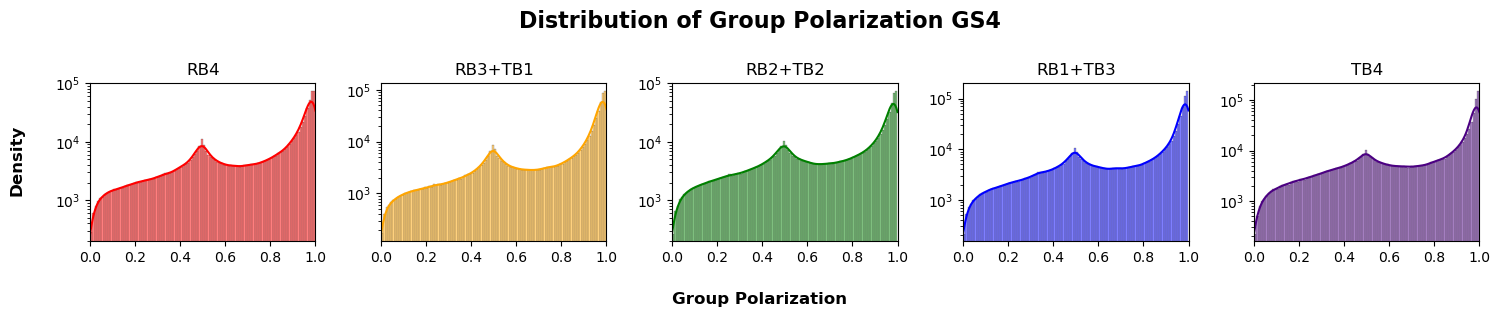

In [64]:
#GROUP POLARIZATION (CONCATENATE)----needs correction

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

colors = ['red', 'orange', 'green', 'blue', 'indigo']
for i in range(5): # treatment
    p = np.empty((1))
    for j in range(10): #replicate
        p = np.concatenate((p, polarization[i][j]))
  
fig.suptitle('Distribution of Group Polarization GS4', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Group Polarization', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('distribution_of_group_polarization_gs4_concatenate.png', bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

IndexError: index 5 is out of bounds for axis 1 with size 5

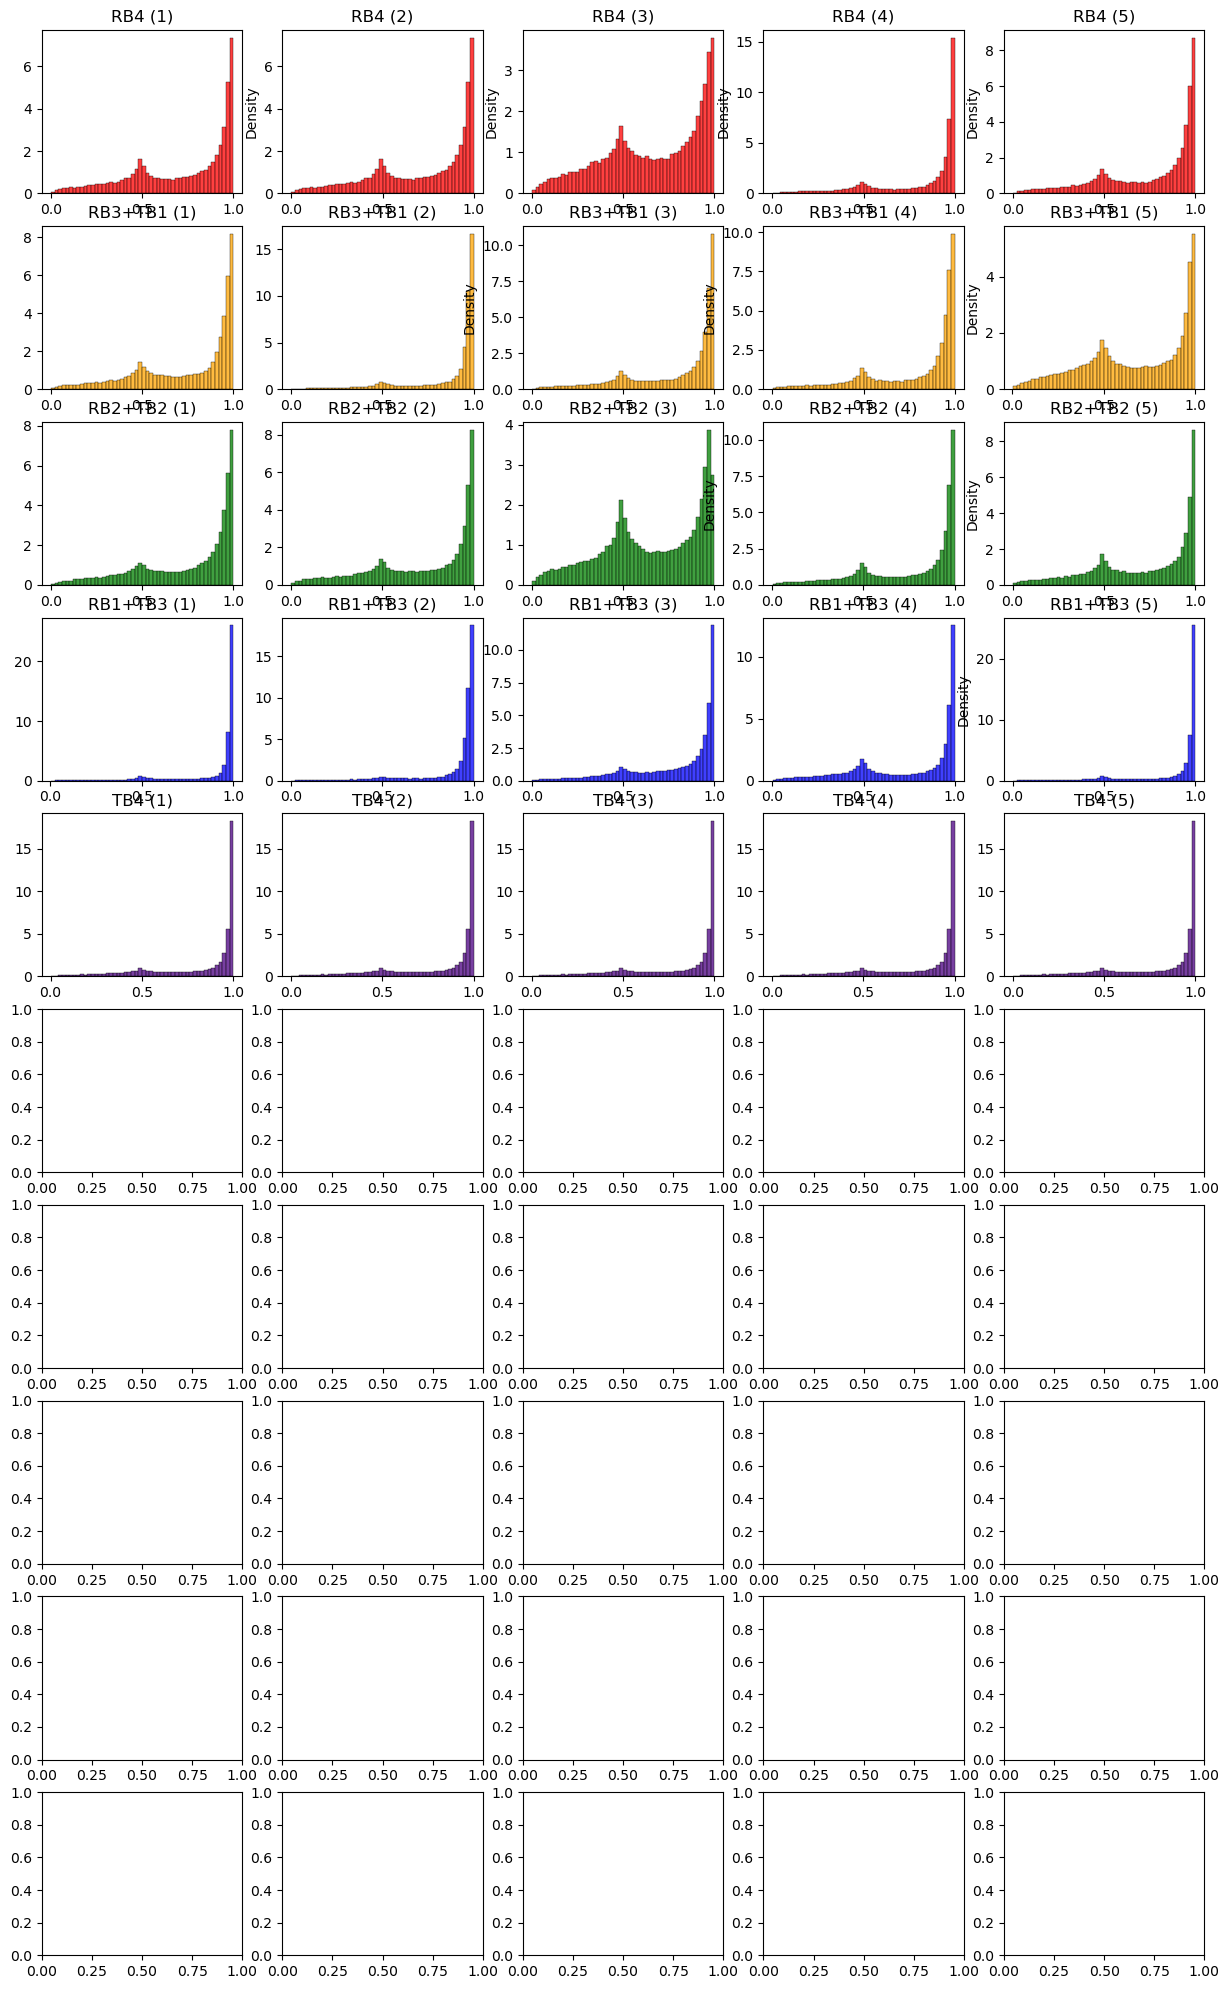

In [70]:
#GROUP POLARIZATION (REPLICATE WISE)

fig, axes = plt.subplots(10, 5, figsize=(15, 25))

colors = ['red', 'orange', 'green', 'blue', 'indigo']

for i in range(10):
    for j in range(5):
        index = i * 10 + j  # Calculate the index of ind_speed
        sns.histplot(polarization[j][i], ax=axes[j, i], 
                     bins=50,
                     color=colors[index % len(colors)], 
                     kde=False, 
                     stat='density') 
       
        #axes[i, j].set_ylim(0, 35)
        #axes[i, j].set_xlim(0, 1)
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')
        axes[i, j].set_title(f'{treatments[i]} ({replicates[j]})')


fig.suptitle('Group Polarization GS 4', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Group Polarization', fontsize=12, fontweight='bold')
fig.supylabel('Density', fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('polarization_barbs_histplot_gs4_replicatewise.png', bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

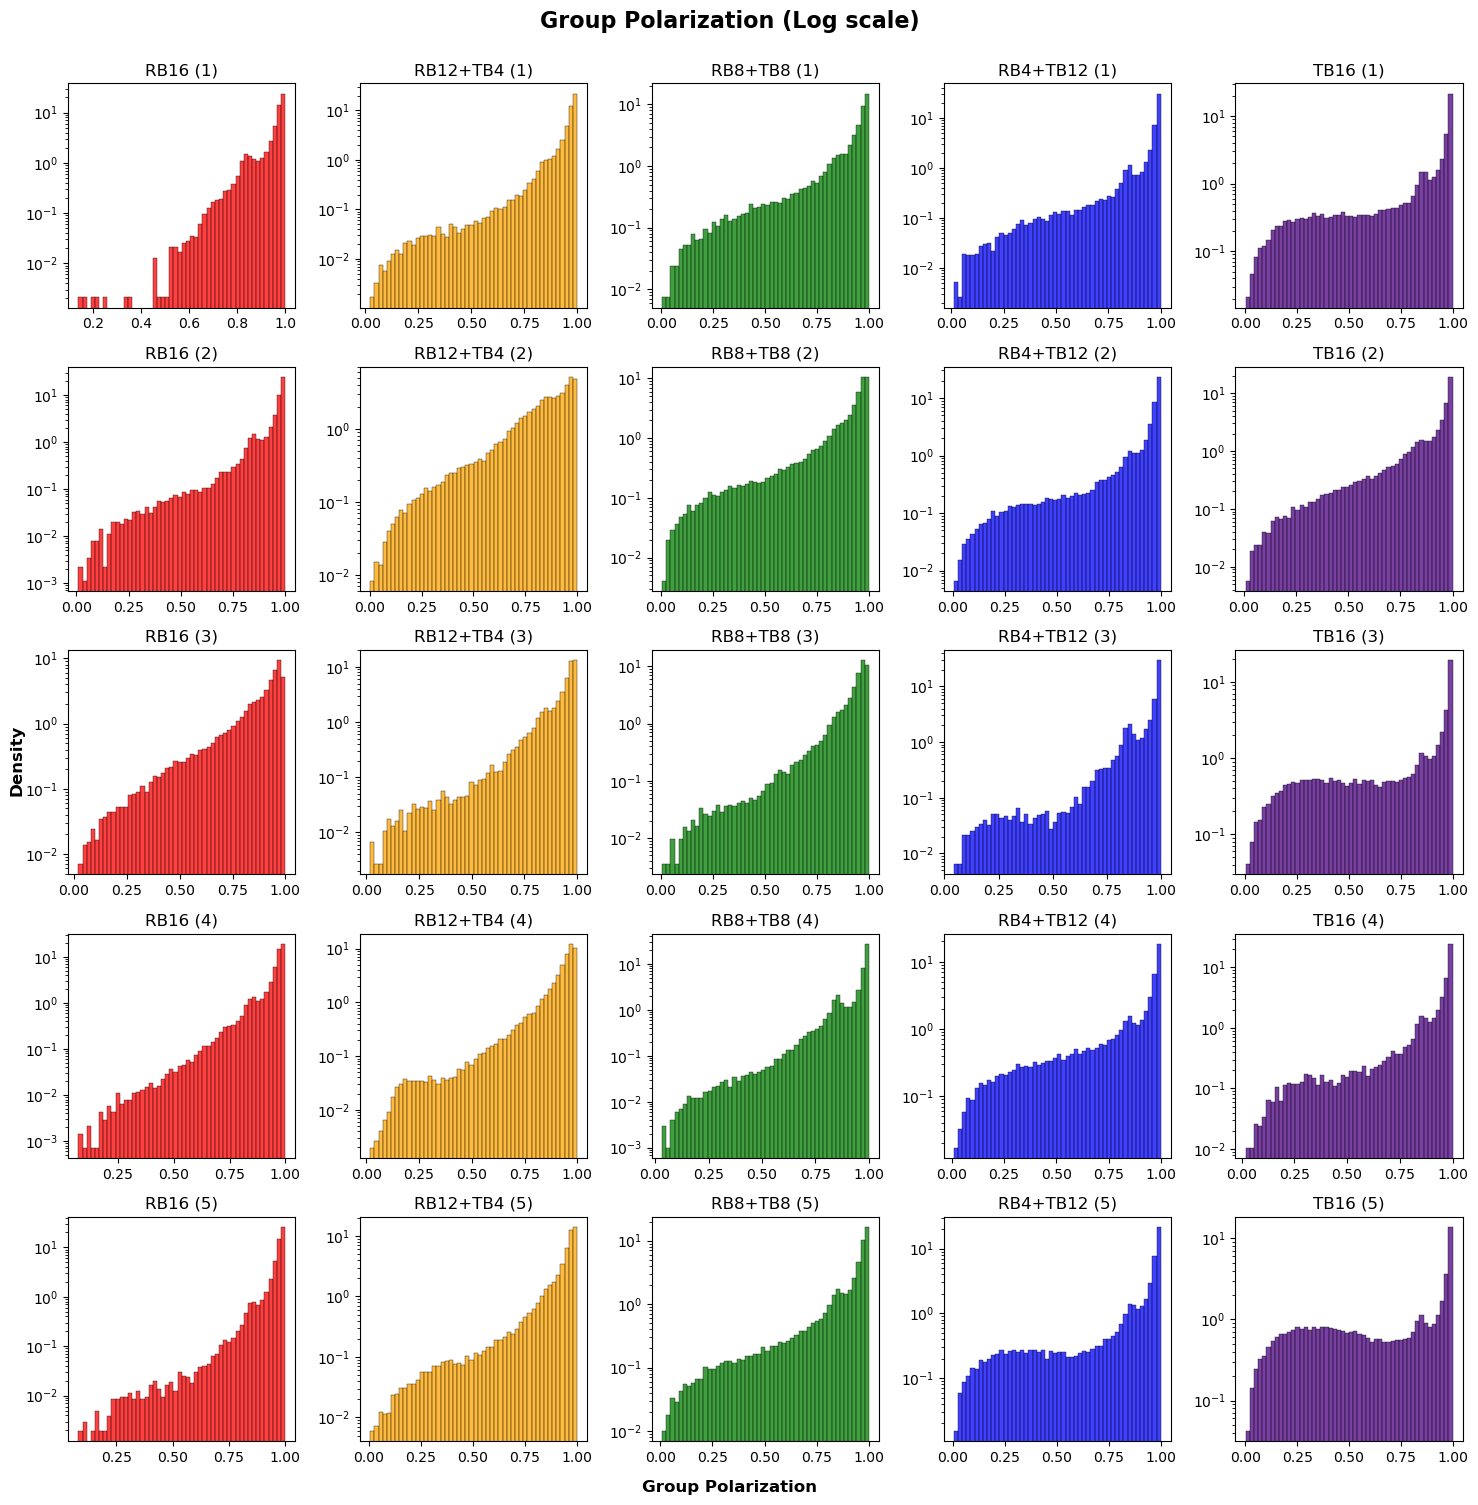

In [17]:
# GROUP POLARIZATION (LOG SCALE-REPLICATE WISE)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))

colors = ['red', 'orange', 'green', 'blue', 'indigo']
for i in range(5):
    for j in range(5):
        index = i * 5 + j 
        sns.histplot(polarization[i][j],
                     ax=axes[i, j], 
                     bins=50, 
                     color=colors[index % len(colors)],  
                     kde=False, log = True, 
                     stat='density') 
        
        #axes[i, j].set_ylim(0, 50)
        #axes[i, j].set_xlim(0, 1)
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')
        axes[i, j].set_title(f'{treatments[j]} ({replicates[i]})')

fig.suptitle('Group Polarization (Log scale)', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Group Polarization', fontsize=12, fontweight='bold')
fig.supylabel('Density', fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('polarization(logscale)_barbs_histplot_replicatewise.png', bbox_inches='tight')